In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

warnings.filterwarnings(action='ignore')

KeyboardInterrupt: 

In [2]:
train_df = pd.read_csv("data/training_full.csv")
test_df = pd.read_csv("data/test_full.csv")

In [3]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


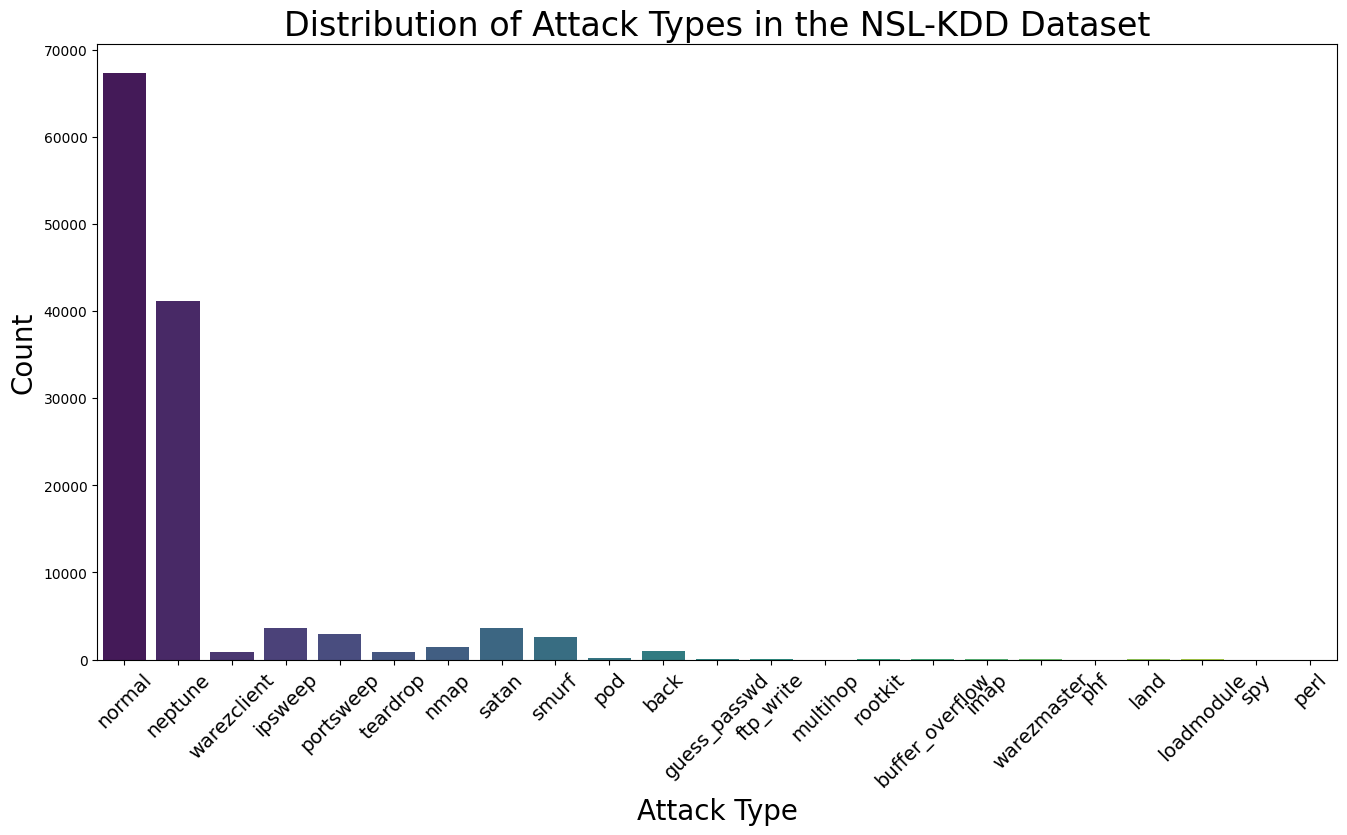

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

sns.countplot(x='attack', data=train_df, palette='viridis')

plt.title('Distribution of Attack Types in the NSL-KDD Dataset', fontsize=24)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.xticks(rotation=45, fontsize=14)

plt.show()

In [4]:
trained_attack = train_df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

train_df['attack_state'] = trained_attack
test_df['attack_state'] = test_attack

In [5]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


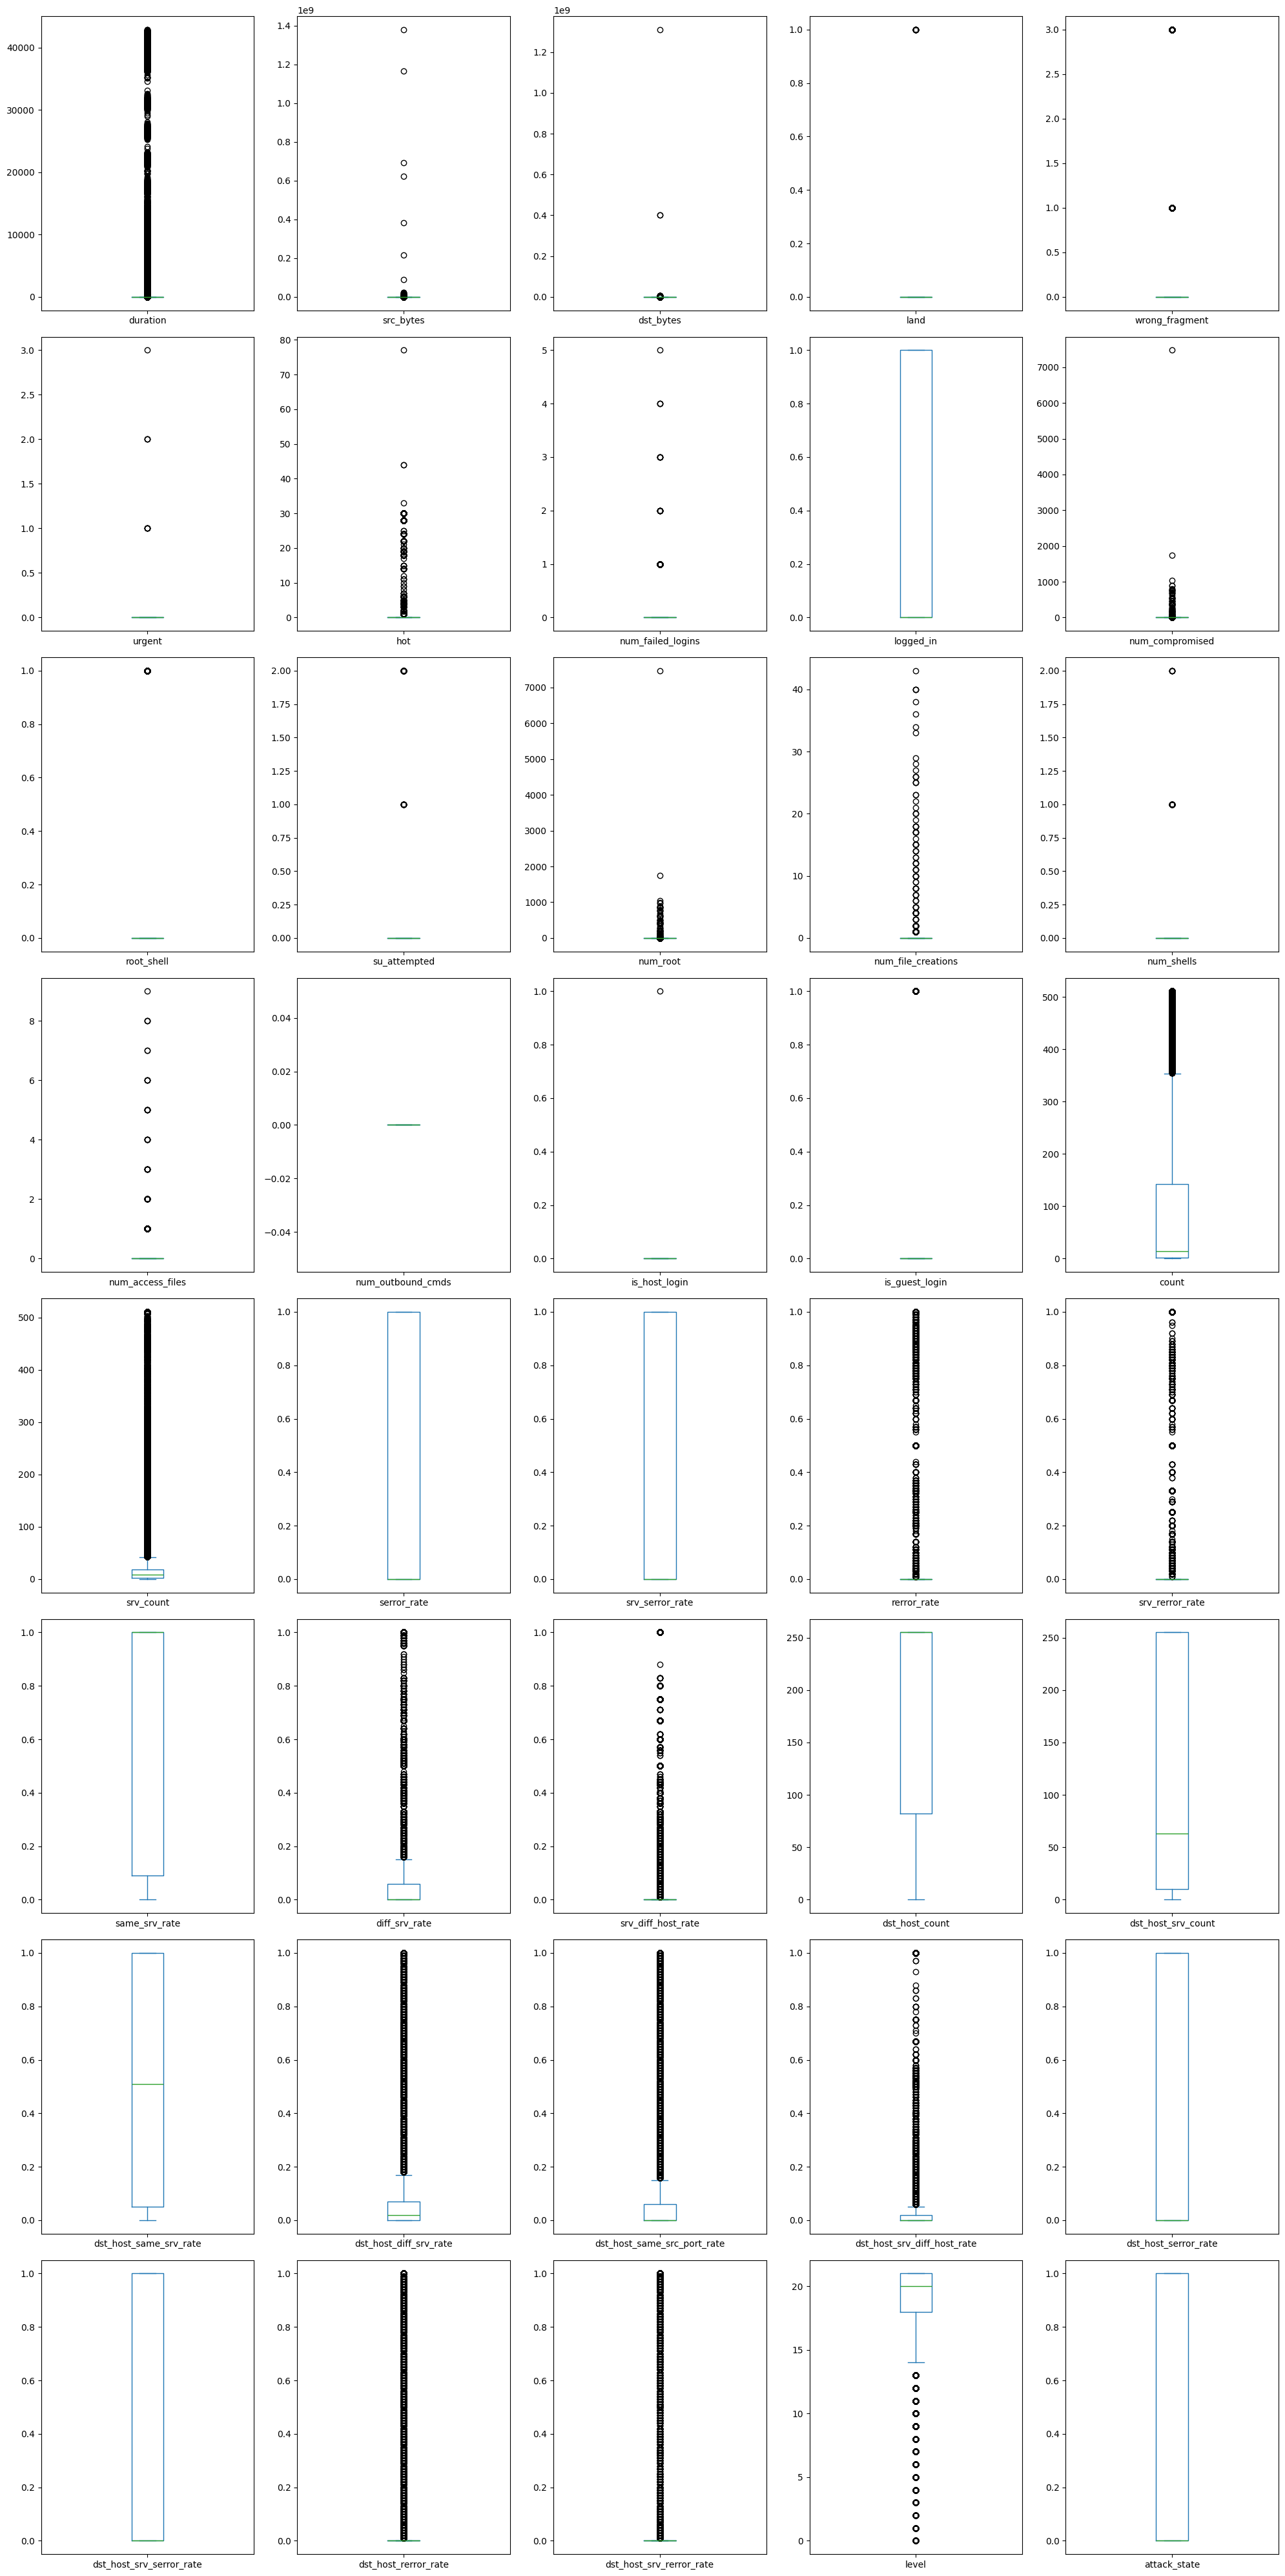

In [7]:
train_df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.tight_layout()
plt.show()

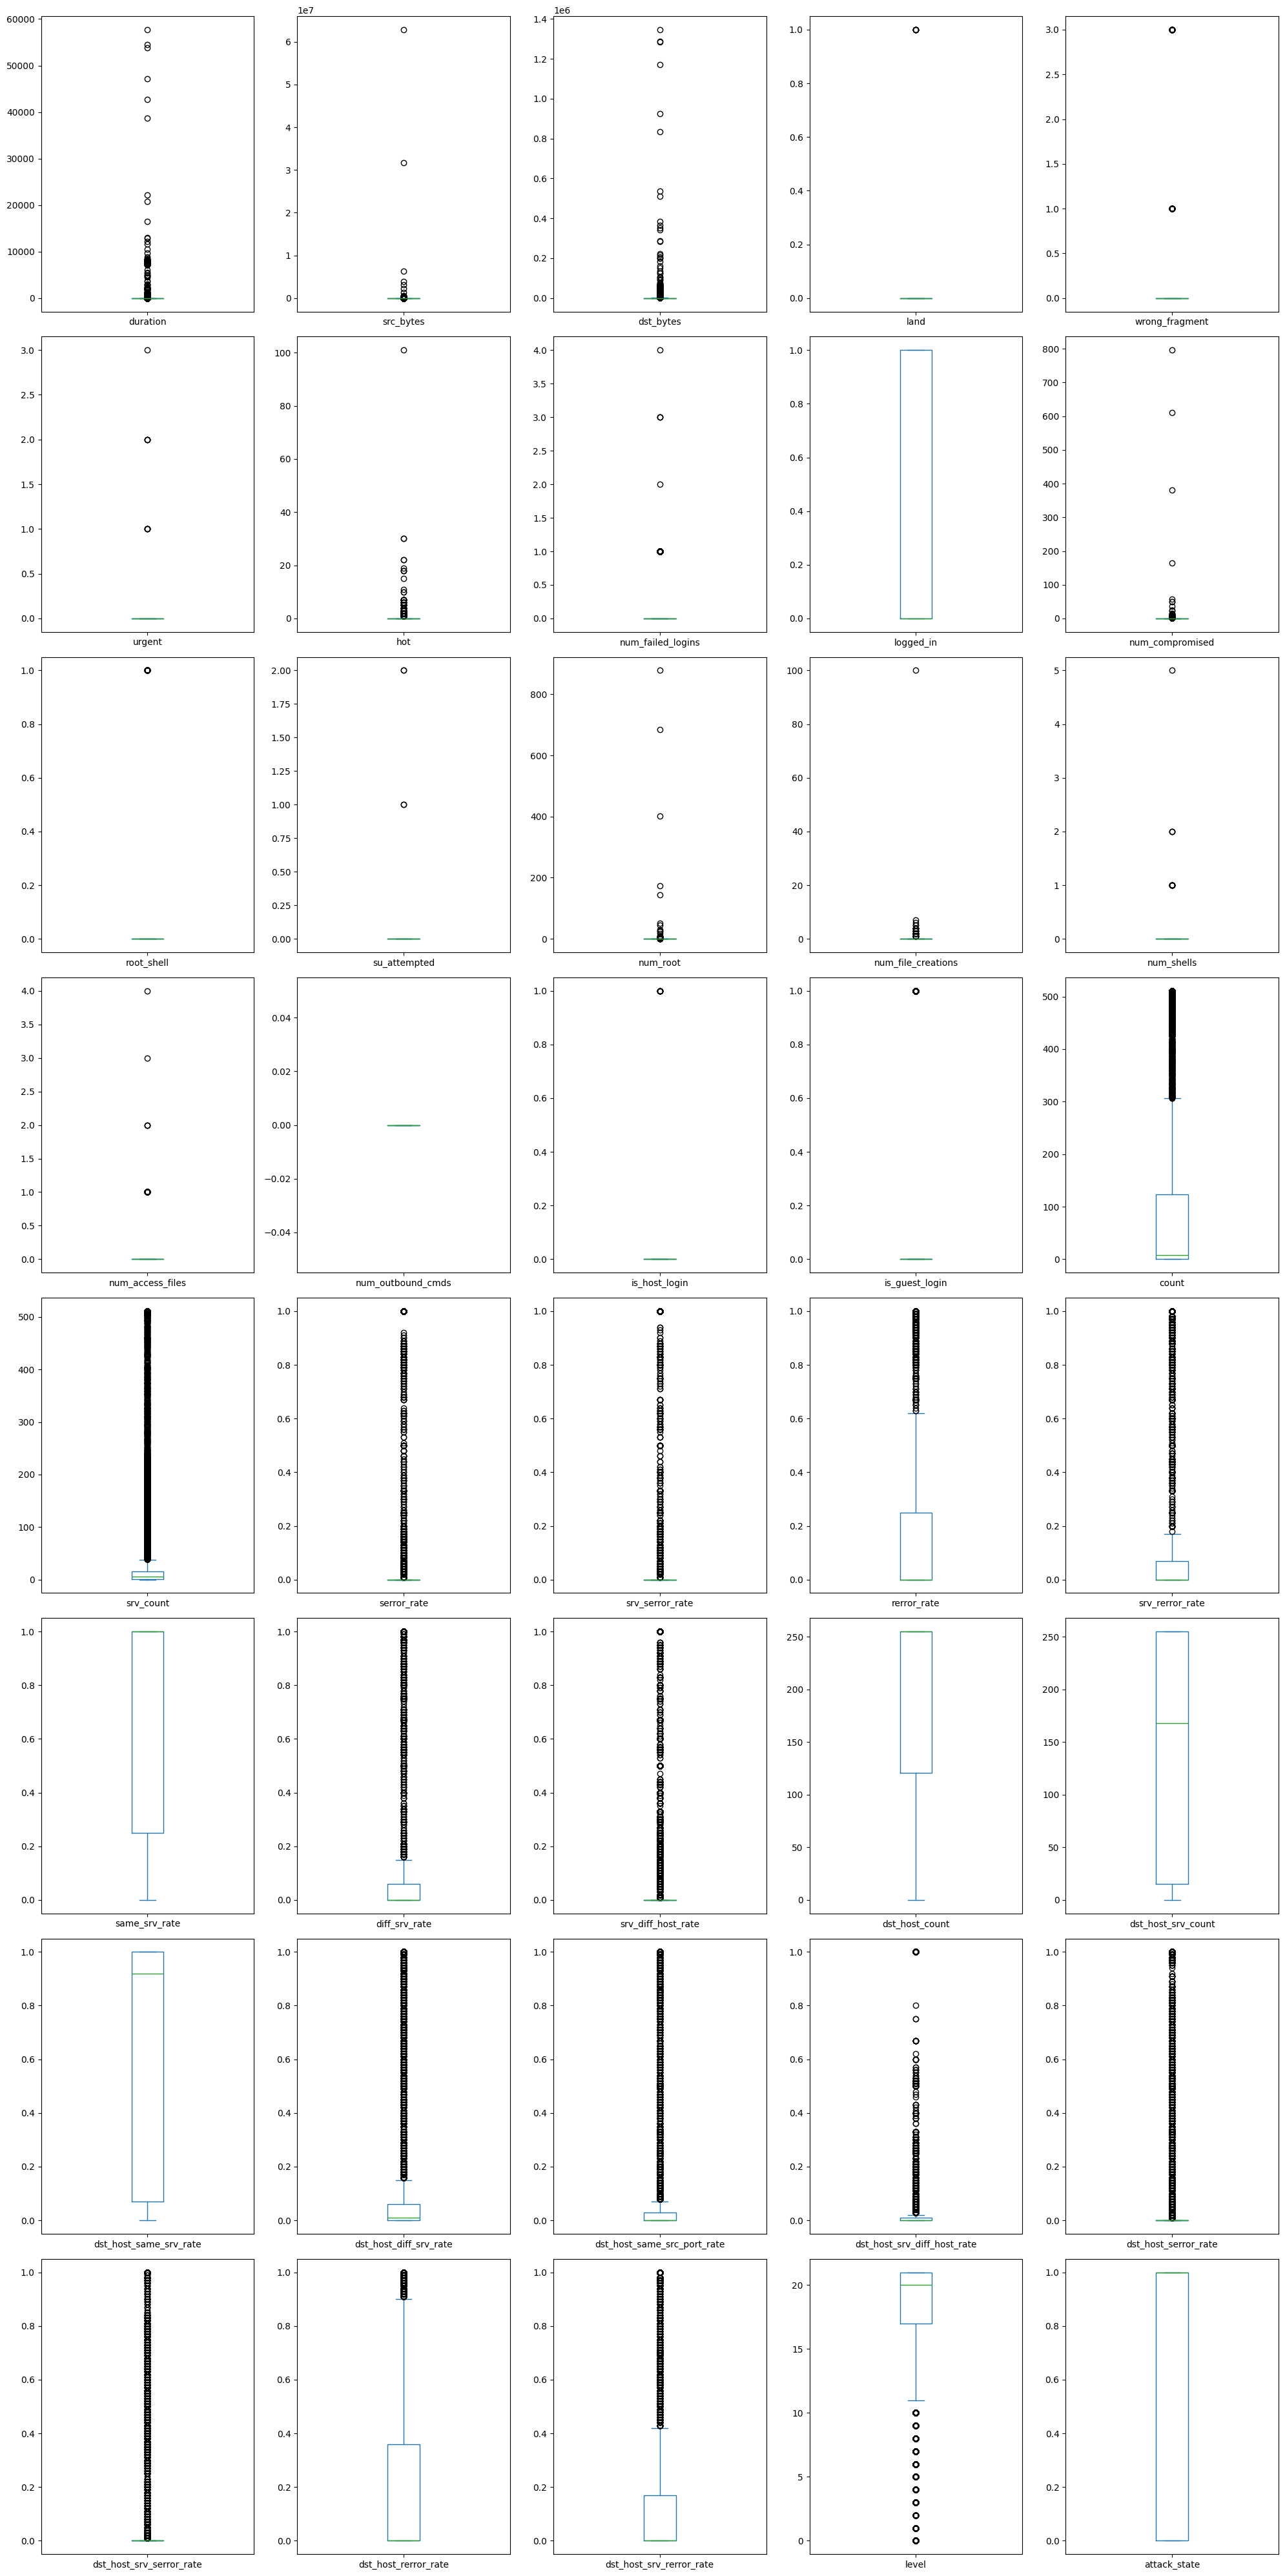

In [8]:
test_df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.tight_layout() 
plt.show()

data encoding

In [6]:
train_df = pd.get_dummies(train_df, columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
test_df = pd.get_dummies(test_df, columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [7]:
train_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False


In [8]:
train_df.to_csv("data/train_prepared.csv", index=False)
test_df.to_csv("data/test_prepared.csv", index=False)

In [10]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
train_df['attack'] = attack_LE.fit_transform(train_df["attack"])
test_df['attack'] = attack_LE.fit_transform(test_df["attack"])

dropping unnecessary stuff

In [11]:
X_train = train_df.drop(['attack', 'level', 'attack_state'], axis=1)
X_test = test_df.drop(['attack', 'level', 'attack_state'], axis=1)

Y_train = train_df['attack_state']
Y_test = test_df['attack_state']

splitting the data

In [12]:
X_train_train, X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

scaling data

In [13]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

evaluating function

In [14]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")

In [15]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

In [16]:
times_elapsed = {}

logistic regression

In [17]:
start = time.time()

In [18]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [19]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)


(0.8642343801268006, 0.8633664623884673)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.863

The Logistic Regression Model Sensitvity = 0.885

The Logistic Regression Model Precision  = 0.834

The Logistic Regression Model F1 Score   = 0.859

The Logistic Regression Model Recall     = 0.885

--------------------------------------------------



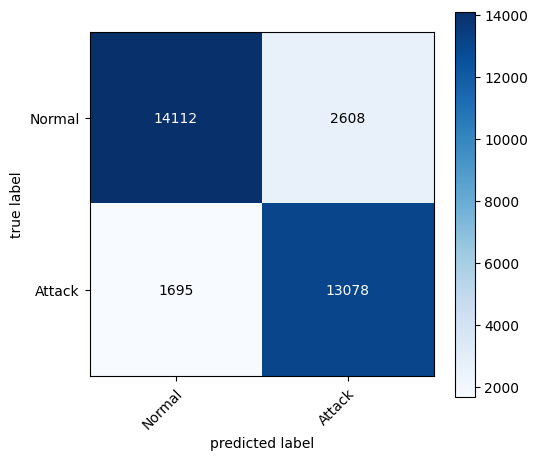

In [20]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

In [21]:
end = time.time()
elapsed = end-start

times_elapsed['LR'] = elapsed

decision tree

In [22]:
start = time.time()

In [23]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [24]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9354988939341018, 0.9329057250817642)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.933

The Decision Tree Classifier Model Sensitvity = 0.879

The Decision Tree Classifier Model Precision  = 0.975

The Decision Tree Classifier Model F1 Score   = 0.925

The Decision Tree Classifier Model Recall     = 0.879

--------------------------------------------------



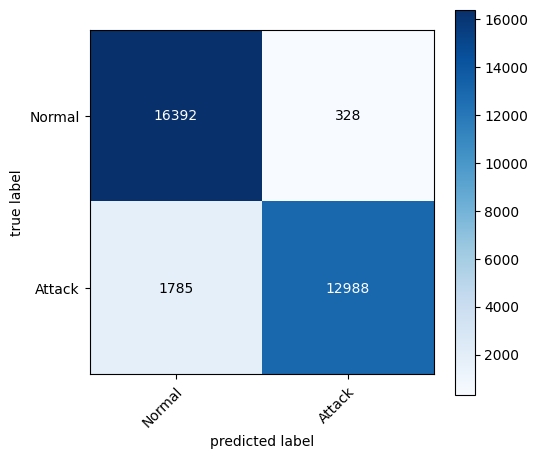

In [25]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

In [26]:
end = time.time()
elapsed = end-start

times_elapsed['DT'] = elapsed

random forest

In [27]:
start = time.time()

In [28]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [29]:
RF= RandomForestClassifier()
# GridSearch(RF, Parameters, X_train_train, Y_train_train)

In [30]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [31]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(0.999947078186687, 0.9989521480964024)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 0.999

The Random Forest Classifier Model Sensitvity = 0.998

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 0.999

The Random Forest Classifier Model Recall     = 0.998

--------------------------------------------------



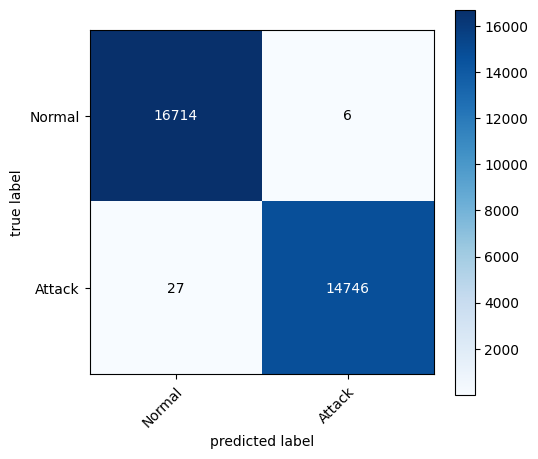

In [32]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

In [33]:
end = time.time()
elapsed = end-start

times_elapsed['RF'] = elapsed

knn

In [34]:
start = time.time()

In [35]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [36]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9936070449517882, 0.9924110119709142)

--------------------------------------------------

The KNN Model Accuracy   = 0.992

The KNN Model Sensitvity = 0.99

The KNN Model Precision  = 0.994

The KNN Model F1 Score   = 0.992

The KNN Model Recall     = 0.99

--------------------------------------------------



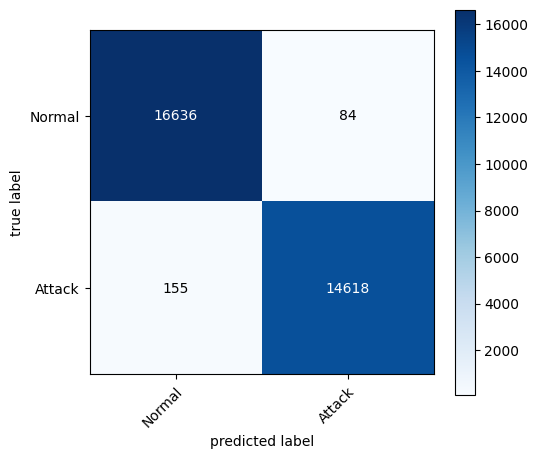

In [37]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

In [38]:
end = time.time()
elapsed = end-start

times_elapsed['KNN'] = elapsed

naive bayes

In [39]:
start = time.time()

In [40]:
GB = GaussianNB()
GB.fit(X_train_train, Y_train_train)

GaussianNB()

In [41]:
GB.score(X_train_train, Y_train_train), GB.score(X_test_train, Y_test_train)

(0.9177806708369055, 0.9175372304956657)

--------------------------------------------------

The GausianGB Model Accuracy   = 0.918

The GausianGB Model Sensitvity = 0.896

The GausianGB Model Precision  = 0.926

The GausianGB Model F1 Score   = 0.911

The GausianGB Model Recall     = 0.896

--------------------------------------------------



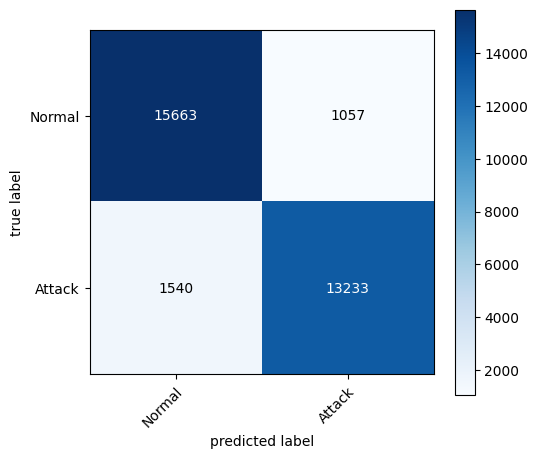

In [42]:
Evaluate('GausianGB', GB, X_test_train, Y_test_train)

In [43]:
end = time.time()
elapsed = end-start

times_elapsed['Naive Bayes'] = elapsed

SVM

In [44]:
start = time.time()

In [45]:
SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM.fit(X_train_train, Y_train_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [46]:
SVM.score(X_train_train, Y_train_train), SVM.score(X_test_train, Y_test_train)

(0.9926967897628044, 0.9918394563871337)

--------------------------------------------------

The SVM Model Accuracy   = 0.992

The SVM Model Sensitvity = 0.994

The SVM Model Precision  = 0.989

The SVM Model F1 Score   = 0.991

The SVM Model Recall     = 0.994

--------------------------------------------------



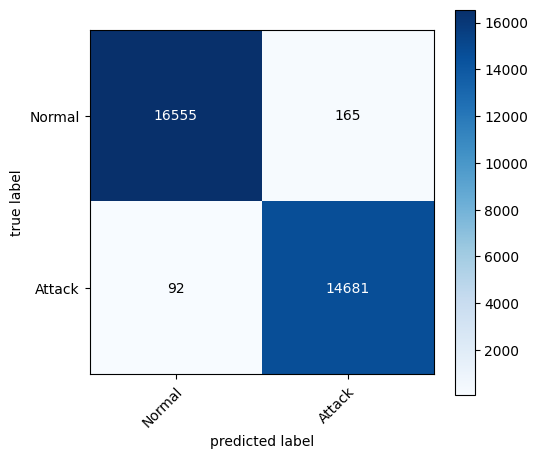

In [47]:
Evaluate('SVM', SVM, X_test_train, Y_test_train)

In [48]:
end = time.time()
elapsed = end-start

times_elapsed['SVM'] = elapsed

gradient boosting classifier

In [49]:
start = time.time()

In [50]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GBC.fit(X_train_train, Y_train_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [51]:
GBC.score(X_train_train, Y_train_train), GBC.score(X_test_train, Y_test_train)

(0.9737825336847342, 0.9732638999142667)

--------------------------------------------------

The GBC Model Accuracy   = 0.973

The GBC Model Sensitvity = 0.981

The GBC Model Precision  = 0.962

The GBC Model F1 Score   = 0.972

The GBC Model Recall     = 0.981

--------------------------------------------------



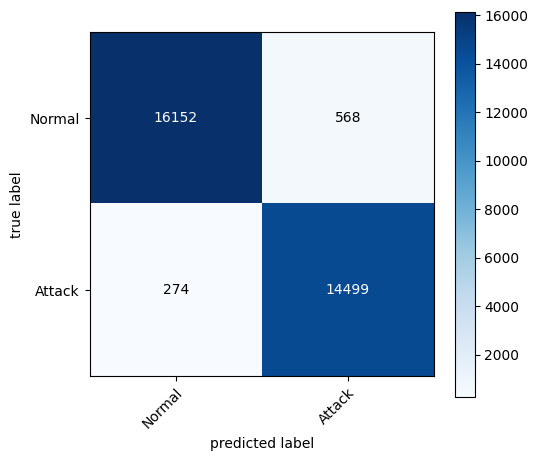

In [52]:
Evaluate('GBC', GBC, X_test_train, Y_test_train)

In [53]:
end = time.time()
elapsed = end-start

times_elapsed['GBC'] = elapsed

MLP classifier

In [54]:
start = time.time()

In [55]:
MLP = MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X_train_train, Y_train_train)

MLPClassifier(max_iter=300, random_state=1)

In [56]:
MLP.score(X_train_train, Y_train_train), MLP.score(X_test_train, Y_test_train)

(0.9891827813588204, 0.9891086908201823)

--------------------------------------------------

The MLP Classifier Model Accuracy   = 0.989

The MLP Classifier Model Sensitvity = 0.992

The MLP Classifier Model Precision  = 0.985

The MLP Classifier Model F1 Score   = 0.988

The MLP Classifier Model Recall     = 0.992

--------------------------------------------------



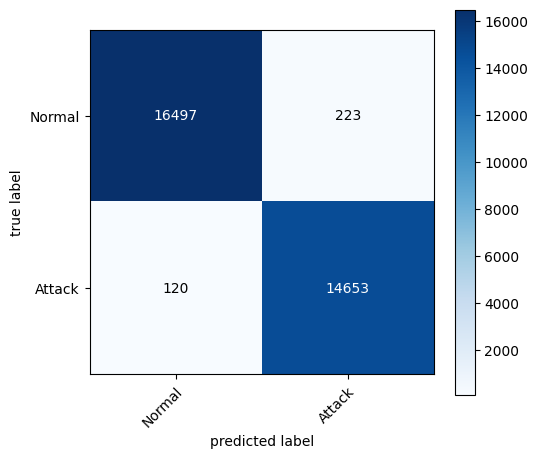

In [57]:
Evaluate('MLP Classifier', MLP, X_test_train, Y_test_train)

In [58]:
end = time.time()
elapsed = end-start

times_elapsed['MLP'] = elapsed

XGBC classifier

In [59]:
start = time.time()

In [60]:
XGBC = XGBClassifier()
XGBC.fit(X_train_train, Y_train_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
XGBC.score(X_train_train, Y_train_train), XGBC.score(X_test_train, Y_test_train)

(0.9998835720107114, 0.9992379258882926)

--------------------------------------------------

The XGBC Classifier Model Accuracy   = 0.999

The XGBC Classifier Model Sensitvity = 0.999

The XGBC Classifier Model Precision  = 0.999

The XGBC Classifier Model F1 Score   = 0.999

The XGBC Classifier Model Recall     = 0.999

--------------------------------------------------



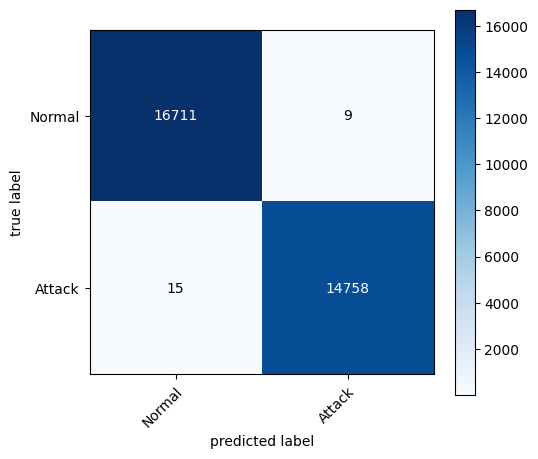

In [62]:
Evaluate('XGBC Classifier', XGBC, X_test_train, Y_test_train)

In [63]:
end = time.time()
elapsed = end-start

times_elapsed['XGBC'] = elapsed

light classifier

In [64]:
start = time.time()

In [65]:
LGBM = LGBMClassifier()
LGBM.fit(X_train_train, Y_train_train)

[LightGBM] [Info] Number of positive: 43857, number of negative: 50622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3301
[LightGBM] [Info] Number of data points in the train set: 94479, number of used features: 109
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464198 -> initscore=-0.143452
[LightGBM] [Info] Start training from score -0.143452


LGBMClassifier()

In [66]:
LGBM.score(X_train_train, Y_train_train), LGBM.score(X_test_train, Y_test_train)

(0.9998200658347358, 0.999015654272378)

--------------------------------------------------

The LGBM Classifier Model Accuracy   = 0.999

The LGBM Classifier Model Sensitvity = 0.999

The LGBM Classifier Model Precision  = 0.999

The LGBM Classifier Model F1 Score   = 0.999

The LGBM Classifier Model Recall     = 0.999

--------------------------------------------------



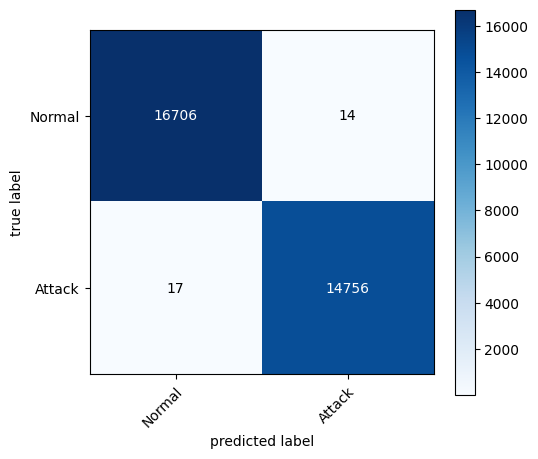

In [67]:
Evaluate('LGBM Classifier', LGBM, X_test_train, Y_test_train)

In [68]:
end = time.time()
elapsed = end-start

times_elapsed['LGBM'] = elapsed

In [69]:
times_elapsed

{'LR': 3.857905864715576,
 'DT': 0.547377347946167,
 'RF': 10.34336519241333,
 'KNN': 92.58654475212097,
 'Naive Bayes': 0.9166505336761475,
 'SVM': 171.96567344665527,
 'GBC': 11.775389671325684,
 'MLP': 25.252321243286133,
 'XGBC': 4.862799406051636,
 'LGBM': 1.9392774105072021}